# Harmonic Oscilator

$$
\ddot{x} +\frac{c}{m}\dot{x} +\frac{k}{m}x = 0
$$

In [1]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def solve_harmonic(m, k, c = 0, x0=5, v0=0, range=[0,10]):
    
    def harmonic(t, q):
        return [q[1], -k*q[0]/m - c*q[1]/m]
    
    return solve_ivp(harmonic, range, [x0, v0], dense_output=True)



In [3]:
m = 1
k = 1
c = 0
x0 = 2.
v0 = 0.
range = [0,15]

solution = solve_harmonic(m,k,c,x0,v0,range)

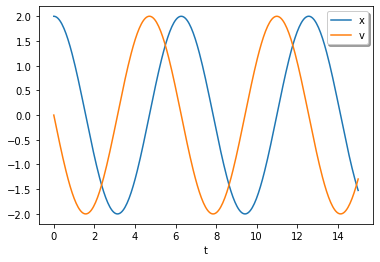

In [4]:
t = np.linspace(0, 15, 300)
z = solution.sol(t)
plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'v'], shadow=True)

Text(0.5, 1.0, 'Harmonic Oscilator - Phase Space')

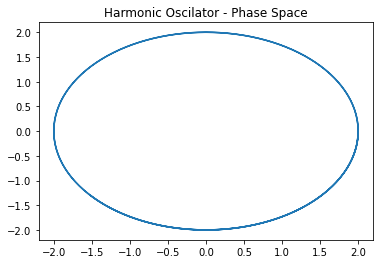

In [5]:
plt.plot(z[0], z[1])
plt.title('Harmonic Oscilator - Phase Space')

In [6]:
c = 0.5
solution = solve_harmonic(m,k,c,x0,v0,range)

Text(0.5, 1.0, 'Damped Harmonic Oscilator')

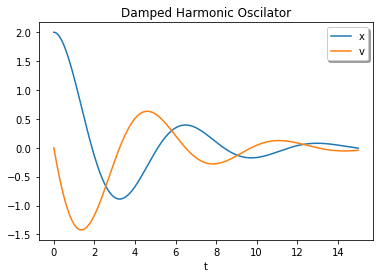

In [7]:
t = np.linspace(0, 15, 300)
z = solution.sol(t)
plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'v'], shadow=True)
plt.title('Damped Harmonic Oscilator')

Text(0.5, 1.0, 'Dampled Harmonic Oscilator - Phase Space')

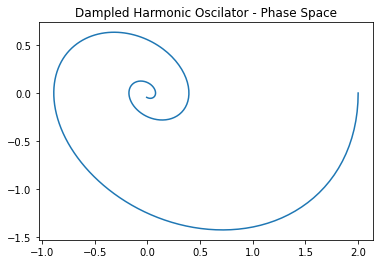

In [8]:
plt.plot(z[0], z[1])
plt.title('Dampled Harmonic Oscilator - Phase Space')

# Projectile